In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [27]:
def generating_submission_csv(prediction, name=""):
    data = {'Id': [k+1 for k in range(len(prediction))], 'Cover_type': prediction}

    # Créez un DataFrame Pandas à partir du dictionnaire
    predictions_df = pd.DataFrame(data)

    # Enregistrez le DataFrame dans un fichier CSV
    predictions_df.to_csv('predictions_'+name+'.csv', index=False)


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données depuis un fichier CSV (remplacez 'votre_fichier.csv' par le nom de votre fichier)
data = pd.read_csv('data/train.csv')

# Calculer la matrice de corrélation
correlation_matrix = data.corr()


In [12]:
sns.set(font_scale=2)
# Définir la taille de la figure
plt.figure(figsize=(100, 120))  # Ajustez les valeurs de largeur et hauteur selon vos préférences

# Afficher la matrice de corrélation sous forme de heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()

Accuracy: 0.71


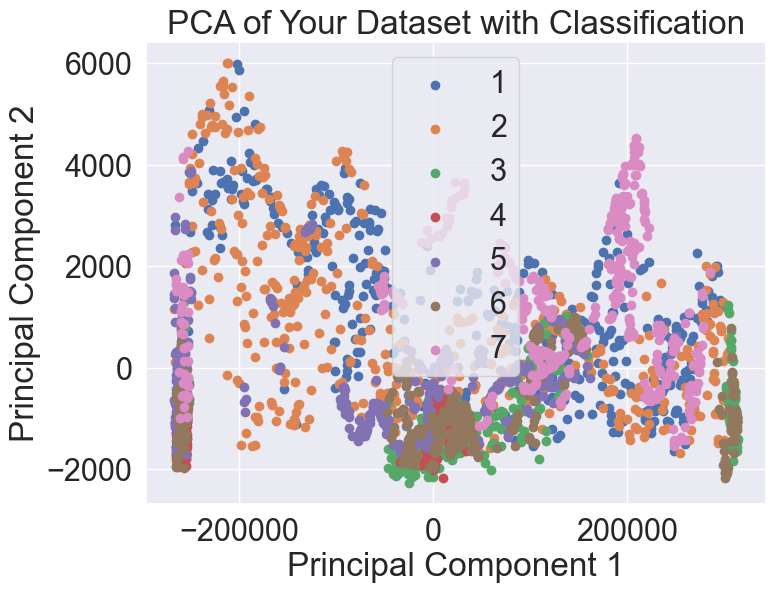

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load your CSV dataset
# Replace 'your_dataset.csv' with the actual filename
df = pd.read_csv('data/train.csv')

# Assuming your target variable is named 'target'
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data if needed
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Perform PCA
n_components = 2  # Number of components to keep (you can change this)
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a classifier on the reduced-dimensional data
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_pca)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Plot the results
plt.figure(figsize=(8, 6))

# Assuming there are two classes for simplicity, adjust if you have more
for class_label in np.unique(y):
    plt.scatter(X_test_pca[y_test == class_label, 0], X_test_pca[y_test == class_label, 1], label=str(class_label))

plt.title('PCA of Your Dataset with Classification')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the dataset from CSV file
file_path = 'data/train.csv'  # Update the file path if needed
df = pd.read_csv(file_path)

# Assuming your target variable is named 'target'
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Train a Support Vector Machine with a linear kernel
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_normalized, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_normalized)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Check if the data is linearly separable
if accuracy == 1.0:
    print("The dataset is linearly separable.")
else:
    print("The dataset may not be perfectly linearly separable.")

# Note: Visualization of decision boundary is not included for high-dimensional datasets.


Accuracy: 0.74
The dataset may not be perfectly linearly separable.


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset from CSV file
file_path = 'data/train.csv'  # Update the file path if needed
df = pd.read_csv(file_path)

# Assuming your target variable is named 'target'
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_normalized, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_normalized)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.89


In [29]:
generating_submission_csv(rf_classifier.predict(scaler.transform(pd.read_csv('data/test-full.csv'))), name="rf")

In [30]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the dataset from CSV file
file_path = 'data/train.csv'  # Update the file path if needed
df = pd.read_csv(file_path)

# Assuming your target variable is named 'target'
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Create a Neural Network Classifier
# Adjust the hyperparameters based on your requirements
nn_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Train the classifier
nn_classifier.fit(X_train_normalized, y_train)

# Make predictions on the test set
y_pred = nn_classifier.predict(X_test_normalized)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.84


In [31]:
generating_submission_csv(nn_classifier.predict(scaler.transform(pd.read_csv('data/test-full.csv'))),"nn")

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the dataset from CSV file
file_path = 'data/train.csv'  # Update the file path if needed
df = pd.read_csv(file_path)

# Assuming your target variable is named 'target'
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Create a KNN Classifier
# Adjust the hyperparameters based on your requirements
for i in range(1, 11):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)  # You can change the number of neighbors (k)

    # Train the classifier
    knn_classifier.fit(X_train_normalized, y_train)

    # Make predictions on the test set
    y_pred = knn_classifier.predict(X_test_normalized)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for {i} neihbors: {accuracy:.2f}')


Accuracy for 1 neihbors: 0.80
Accuracy for 2 neihbors: 0.78
Accuracy for 3 neihbors: 0.79
Accuracy for 4 neihbors: 0.79
Accuracy for 5 neihbors: 0.79
Accuracy for 6 neihbors: 0.79
Accuracy for 7 neihbors: 0.78
Accuracy for 8 neihbors: 0.78
Accuracy for 9 neihbors: 0.78
Accuracy for 10 neihbors: 0.77


In [47]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from itertools import product

# Load your dataset from a CSV file
data = pd.read_csv('data/train.csv')  # Replace 'your_dataset.csv' with your actual CSV file

# Assuming the target variable is in a column named 'target_column'
X = data.drop('Cover_Type', axis=1)
y = data['Cover_Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = y_train - 1
y_test = y_test - 1

# Define hyperparameters grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Initialize variables to store best hyperparameters and performance
best_params = None
best_accuracy = 0.0

# Loop over all combinations of hyperparameters
for params in product(*param_grid.values()):
    hyperparameters = dict(zip(param_grid.keys(), params))
    
    # Create an XGBoost classifier with current hyperparameters
    xg_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(y)), **hyperparameters)

    # Fit the model to the training data
    xg_clf.fit(X_train, y_train)

    # Predictions on the test set
    preds = xg_clf.predict(X_test)

    # Evaluate the model using accuracy (you can use other classification metrics)
    accuracy = accuracy_score(y_test, preds)

    # Update the best hyperparameters if the current combination is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = hyperparameters

# Print the best hyperparameters and performance
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)


/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8, 'colsample_bytree': 1.0}
Best Accuracy: 0.896494708994709


/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/opt/homebrew/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


In [49]:
# Train the model with the best hyperparameters on the entire dataset
xg_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(y)),**best_params)
xg_clf.fit(X, y-1)

# Make predictions on the test set
generating_submission_csv(xg_clf.predict(pd.read_csv('data/test-full.csv'))+1, name="xgboost")


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6], got [1 2 3 4 5 6 7]